# Report on Bitcoin prices dataset

## Objectives and Dataset Summary

I have chosen to build models that will perform time series forecasting on the historical prices of Bitcoin dataset.

In [39]:
import pandas as pd 
import pandas_datareader as web 
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

btc = web.get_data_yahoo(['BTC-USD'], start=datetime.datetime(2018, 1, 1), end=datetime.datetime(2020, 12, 2))

print(btc.head())

Attributes     Adj Close         Close          High           Low  \
Symbols          BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2018-01-01  13657.200195  13657.200195  14112.200195  13154.700195   
2018-01-02  14982.099609  14982.099609  15444.599609  13163.599609   
2018-01-03  15201.000000  15201.000000  15572.799805  14844.500000   
2018-01-04  15599.200195  15599.200195  15739.700195  14522.200195   
2018-01-05  17429.500000  17429.500000  17705.199219  15202.799805   

Attributes          Open       Volume  
Symbols          BTC-USD      BTC-USD  
Date                                   
2018-01-01  14112.200195  10291200000  
2018-01-02  13625.000000  16846600192  
2018-01-03  14978.200195  16871900160  
2018-01-04  15270.700195  21783199744  
2018-01-05  15477.200195  23840899072  


Our dataframe contains 7 columns:

1. Date: This is the index in our time series that specifies the date associated with the price.

2. Close: The last price at which BTC was purchased on that day.

3. Open: The first price at which BTC was purchased on that day.

4. High: The highest price at which BTC was purchased that day.

5. Low:  The lowest price at which BTC was purchased that day.

6. Volume: The number of total trades that day.

7. Adj Close: The closing price adjusted for dividends and stock splits.

## Data Exploration/Cleaning

For our forecasting models we will only look at the close price so let's remove the other columns.

In [40]:
btc = btc['Close']

btc.to_csv("btc.csv")

btc = pd.read_csv("btc.csv")

print(btc.head())

         Date       BTC-USD
0  2018-01-01  13657.200195
1  2018-01-02  14982.099609
2  2018-01-03  15201.000000
3  2018-01-04  15599.200195
4  2018-01-05  17429.500000


Now we can visualise our data using seaborn and matplotlib.

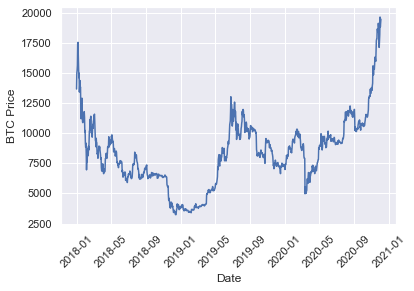

In [41]:
btc.index = pd.to_datetime(btc['Date'], format='%Y-%m-%d')
del btc['Date']

sns.set()
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(btc.index, btc['BTC-USD'], )
plt.show()

## Model Training

We are going to investigate 3 different types of models:

1. ARMA model
2. ARIMA model
3. SARIMA model

We split our data such that everything before November 2020 will be training data.

Text(0.5, 1.0, 'Train/Test split for BTC Data')

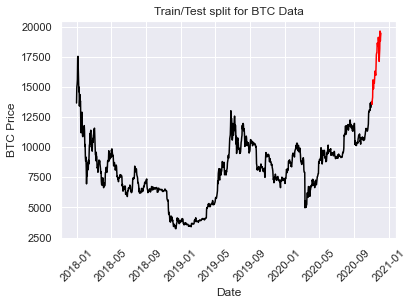

In [42]:
train = btc[btc.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test = btc[btc.index >= pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")

### ARMA model

ARMA RMSE:  3684.7071744466793


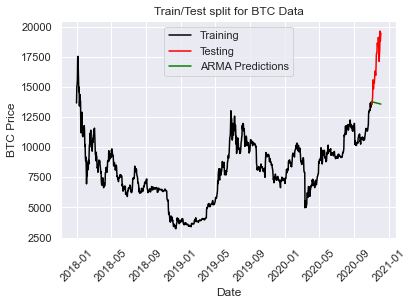

In [43]:
y = train['BTC-USD']

ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='green', label = 'ARMA Predictions')
plt.legend()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("ARMA RMSE: ",arma_rmse)


### ARIMA model

ARIMA RMSE:  791.8976090890285


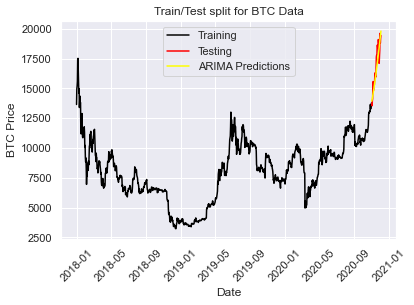

In [44]:
ARIMAmodel = ARIMA(y, order = (5, 4, 2))
ARIMAmodel = ARIMAmodel.fit()

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ",arma_rmse)

### SARIMA model

SARIMA RMSE:  1098.9664978254086


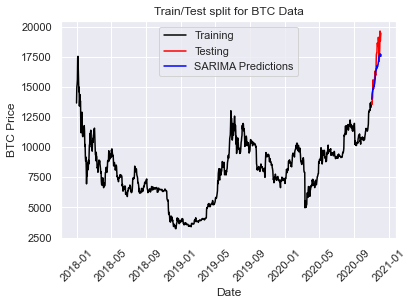

In [45]:
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("SARIMA RMSE: ",arma_rmse)

## Summary of Key Findings and Insights

The ARMA model had an extremely high error of 3685. The ARIMA model had a much lower error of 792. The SARIMA model had a slightly higher error of 1099. Clearly the ARIMA model performed best and is the final model to recommend.

## Next Steps

The performance may be able to be improved further by tuning the hyperparameters. So the next steps could be to use something like GridSearch to find suitable hyperparameters algorithmically.